# Workshop 2 -  Data Exploration and Visualization

<h1>Sections:<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Exploration</a></span><ul class="toc-item"><li><span><a href="#Statistics" data-toc-modified-id="Statistics-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Statistics</a></span></li><li><span><a href="#Correlation-and-Dependency" data-toc-modified-id="Correlation-and-Dependency-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Correlation and Dependency</a></span></li><li><span><a href="#Data-Visualization" data-toc-modified-id="Data-Visualization-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Data Visualization</a></span></li><li><span><a href="#Time-Series:-Correlation-and-Seasonality" data-toc-modified-id="Time-Series:-Correlation-and-Seasonality-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Time Series: Correlation and Seasonality</a></span></li></ul></li></ul></div>

In [1]:
import verticapy as vp
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext verticapy.sql

In [2]:
# Connect with the database
vp.connect("tutorial_connection")

,123pclassInt,123survivedInt,AbcVarchar(164),AbcsexVarchar(20),"123ageNumeric(6,3)",123sibspInt,123parchInt,AbcticketVarchar(36),"123fareNumeric(10,5)",AbccabinVarchar(30),AbcembarkedVarchar(20),AbcboatVarchar(100),123bodyInt,Abchome.destVarchar(100)
1,1,0,,female,2.0,1,2,113781,151.55,C22 C26,S,[null],[null],"Montreal, PQ / Chesterville, ON"
2,1,0,,male,30.0,1,2,113781,151.55,C22 C26,S,[null],135,"Montreal, PQ / Chesterville, ON"
3,1,0,,female,25.0,1,2,113781,151.55,C22 C26,S,[null],[null],"Montreal, PQ / Chesterville, ON"
4,1,0,,male,39.0,0,0,112050,0.0,A36,S,[null],[null],"Belfast, NI"
5,1,0,,male,71.0,0,0,PC 17609,49.5042,[null],C,[null],22,"Montevideo, Uruguay"
6,1,0,,male,47.0,1,0,PC 17757,227.525,C62 C64,C,[null],124,"New York, NY"
7,1,0,,male,[null],0,0,PC 17318,25.925,[null],S,[null],[null],"New York, NY"
8,1,0,,male,24.0,0,1,PC 17558,247.5208,B58 B60,C,[null],[null],"Montreal, PQ"
9,1,0,,male,36.0,0,0,13050,75.2417,C6,C,A,[null],"Winnipeg, MN"
10,1,0,,male,25.0,0,0,13905,26.0,[null],C,[null],148,"San Francisco, CA"

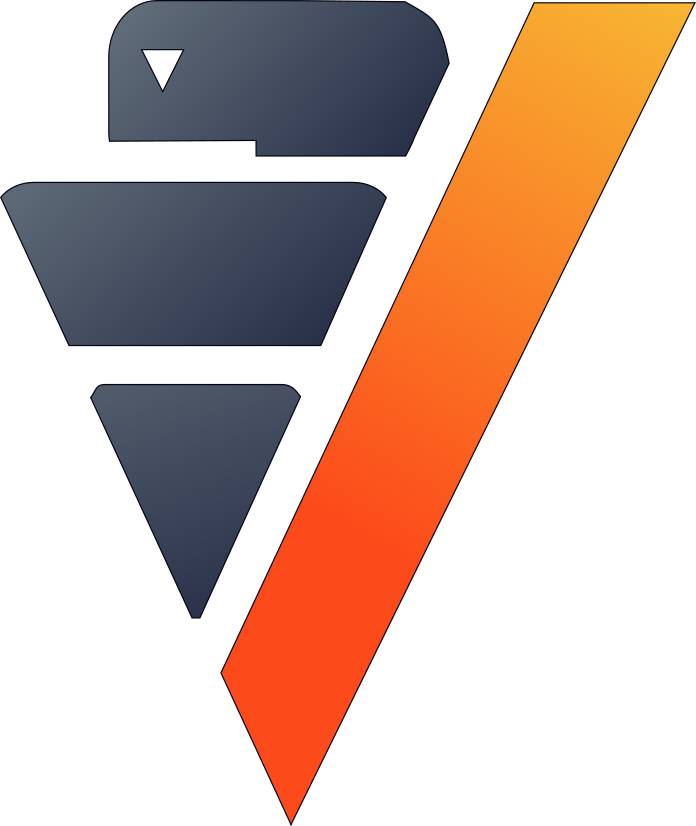

In [3]:
from verticapy.datasets import load_titanic
load_titanic()  # Loading the titanic dataset in Vertica
# titanic relation is already existed in database
titanic = vp.vDataFrame("public.titanic")
display(titanic)

In [4]:
try:
    # read data
    vp.read_csv('data/churn.csv',
                table_name='churn',
                schema='public',
                parse_nrows=5000)
    # Read churn data from db
    churn_data = vp.vDataFrame('public.churn')
except:
    churn_data = vp.vDataFrame('public.churn')

## Data Exploration

### Statistics

The syntax of VerticaPy is similar to Pandas when you are dealing with vDataFrame. You can conduct descriptive statistics

,count,mean,std,min,approx_25%,approx_50%,approx_75%,max
"""pclass""",1234,2.28444084278768,0.842485636190292,1.0,1.0,3.0,3.0,3.0
"""survived""",1234,0.364667747163696,0.481532018641288,0.0,0.0,0.0,1.0,1.0
"""age""",997,30.1524573721163,14.4353046299159,0.33,21.0,28.0,39.0,80.0
"""sibsp""",1234,0.504051863857374,1.04111727241629,0.0,0.0,0.0,1.0,8.0
"""parch""",1234,0.378444084278768,0.868604707790393,0.0,0.0,0.0,0.0,9.0
"""fare""",1233,33.963793673966,52.6460729831293,0.0,7.8958,14.4542,31.3875,512.3292
"""body""",118,164.14406779661,96.5760207557808,1.0,79.25,160.5,257.5,328.0

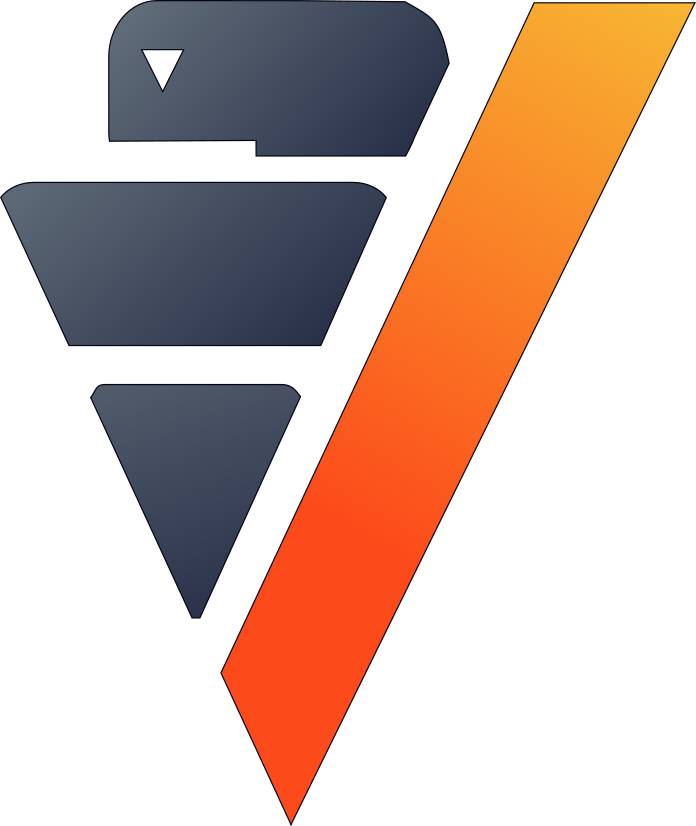

In [5]:
# Compute the statistics for numerical columns by default
titanic.describe()

,dtype,count,top,top_percent
"""pclass""",int,1234,3,53.728
"""survived""",int,1234,0,63.533
"""name""",varchar(164),1234,"Connolly, Miss. Kate",0.162
"""sex""",varchar(20),1234,male,65.964
"""age""","numeric(6,3)",997,[null],19.206
"""sibsp""",int,1234,0,67.747
"""parch""",int,1234,0,76.904
"""ticket""",varchar(36),1234,CA. 2343,0.81
"""fare""","numeric(10,5)",1233,8.05,4.7
"""cabin""",varchar(30),286,[null],76.823

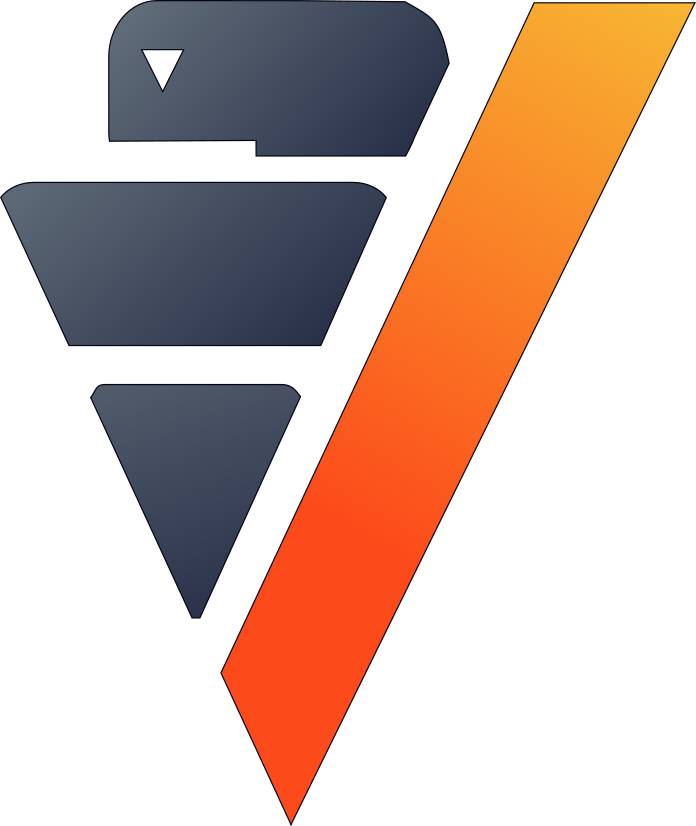

In [6]:
# Compute the statistics for categorical columns
titanic.describe(method='categorical')

[`agg`](https://www.vertica.com/python/documentation_last/vdataframe/main-methods/agg/index.php) provides a wide range of different aggregations.

,min,15%,95%,unique
"""pclass""",1.0,1.0,3.0,3.0
"""survived""",0.0,0.0,1.0,2.0
"""age""",0.33,18.0,57.0,96.0
"""sibsp""",0.0,0.0,2.0,7.0
"""parch""",0.0,0.0,2.0,8.0
"""fare""",0.0,7.75,134.5,277.0
"""body""",1.0,50.55,307.3,118.0

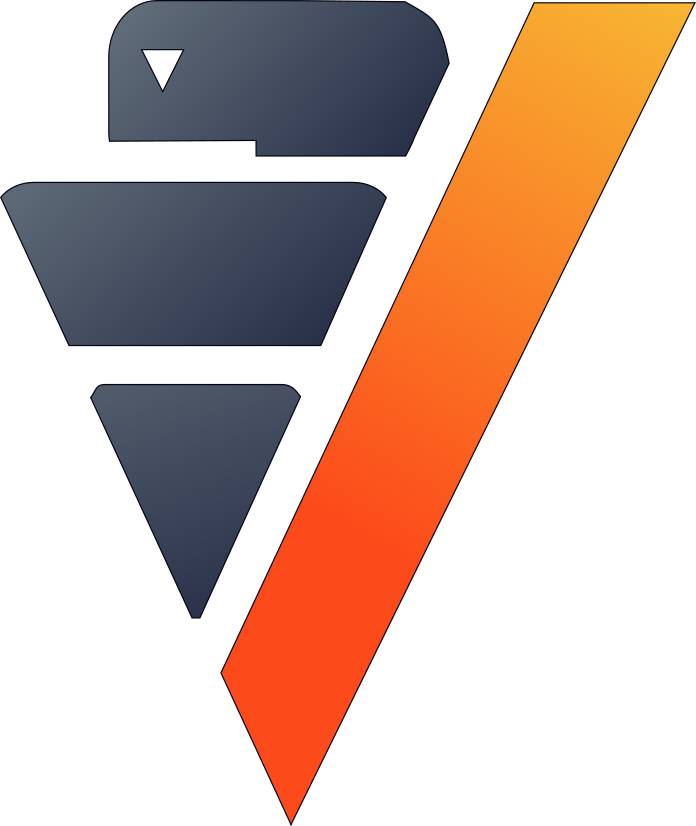

In [7]:
# For specific statistical quantities you can use agg function
titanic.agg(func=["min", "15%", "95%", "unique"])

You can also group by a specific column or columns and perform aggregations and statistical computations

,AbcsexVarchar(20),123survivedInteger,123avg_ageFloat(22),123min_ageNumeric(8),123max_ageNumeric(8)
1,female,0,25.6098901098901,1.0,63.0
2,male,1,27.1693548387097,0.42,80.0
3,female,1,30.4266666666667,0.75,76.0
4,male,0,31.5312233009709,0.33,74.0

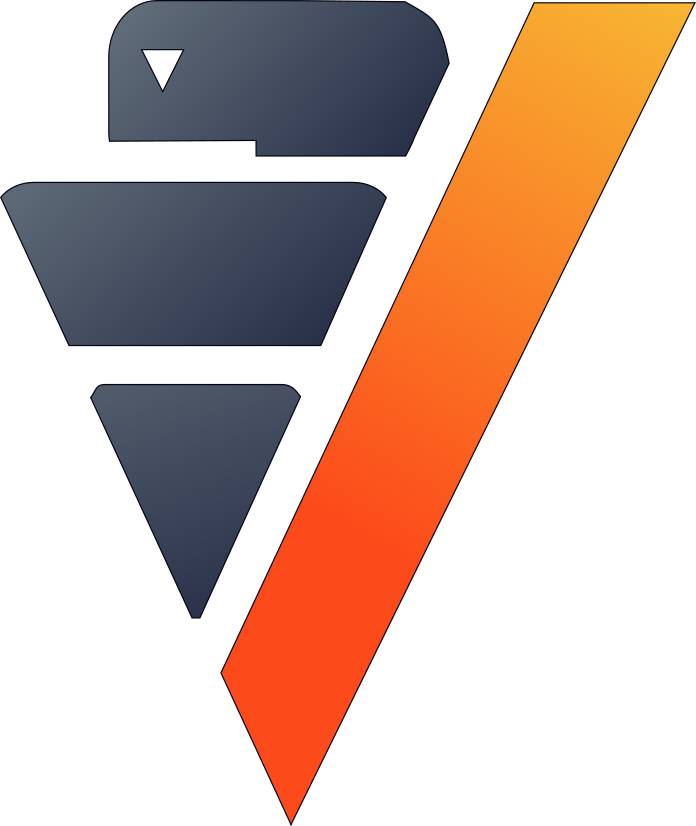

In [8]:
# with SQL way
titanic.groupby(columns=['sex', 'survived'],
                expr=['AVG(age) AS avg_age',
                      'MIN(age) AS min_age',
                      'MAX(age) AS max_age'])

### Correlation and Dependency

The correlation and dependency are finding the relation between the variables which is a very important task. Finding the relations between the variables is the main task of data science.  

Correlated variables can lead to skewed or misleading results, however, decision trees and boosted trees algorithms are immune by nature. 

,AbccustomerIDVarchar(20),AbcgenderVarchar(20),123SeniorCitizenInt,010PartnerBoolean,010DependentsBoolean,123tenureInt,010PhoneServiceBoolean,AbcMultipleLinesVarchar(100),AbcInternetServiceVarchar(22),AbcOnlineSecurityVarchar(38),AbcOnlineBackupVarchar(38),AbcDeviceProtectionVarchar(38),AbcTechSupportVarchar(38),AbcStreamingTVVarchar(38),AbcStreamingMoviesVarchar(38),AbcContractVarchar(28),010PaperlessBillingBoolean,AbcPaymentMethodVarchar(50),"123MonthlyChargesNumeric(8,3)","123TotalChargesNumeric(9,3)",010ChurnBoolean
1,0002-ORFBO,Female,0,✅,✅,9,✅,No,DSL,No,Yes,No,Yes,Yes,No,One year,✅,Mailed check,65.6,593.3,❌
2,0003-MKNFE,Male,0,❌,❌,9,✅,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,❌,Mailed check,59.9,542.4,❌
3,0004-TLHLJ,Male,0,❌,❌,4,✅,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,✅,Electronic check,73.9,280.85,✅

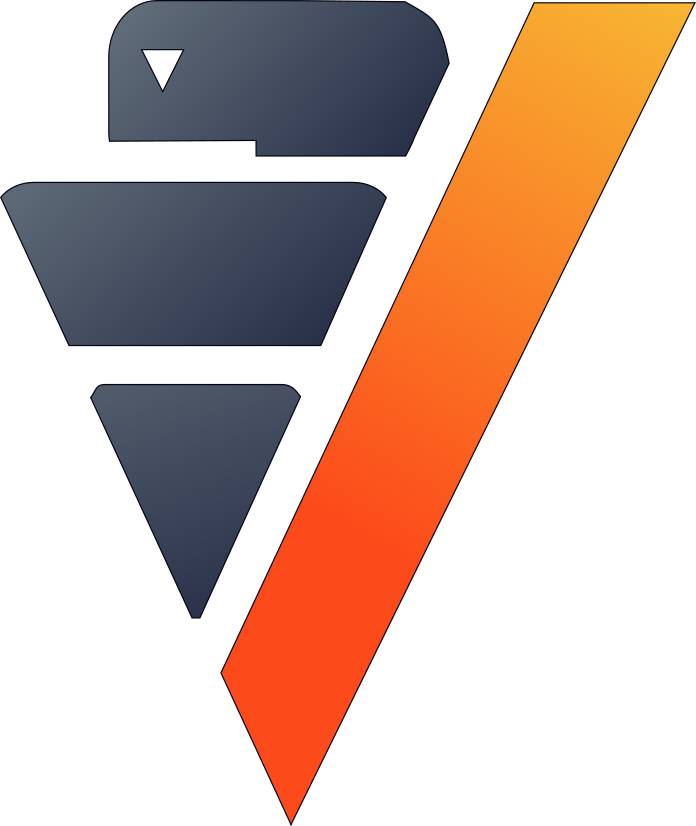

In [9]:
# display data
churn_data.head(3)

VerticaPy offers different types of correlation: `pearson`, `spearman`, `cramer`, and more.
Each type has it's specificity:
- pearson for linear corrlation (numerical variables)
- spearman rank correlation (numerical and categorical)
- cramer correlation between categorical variables

For more details please refer to his link [corr()](https://www.vertica.com/python/documentation_last/vdataframe/main-methods/corr/index.php). 

In [10]:
# select columns
num_cols = churn_data.numcol()
cat_clos = churn_data.catcol(max_cardinality=10)

,"""SeniorCitizen""","""Partner""","""Dependents""","""tenure""","""PhoneService""","""PaperlessBilling""","""MonthlyCharges""","""TotalCharges""","""Churn"""
"""SeniorCitizen""",1.0,0.0164786575974139,-0.211185088493958,0.0190767898701152,0.00857640107927944,0.156529559311173,0.221092529102162,0.105795342303725,0.150889328176473
"""Partner""",0.0164786575974139,1.0,0.452676282929464,0.384665710284119,0.017705663223972,-0.014876622287891,0.108410945895981,0.343930553215626,-0.150447544959177
"""Dependents""",-0.211185088493958,0.452676282929464,1.0,0.164485741353804,-0.00176167854468371,-0.111377229193644,-0.107082725586711,0.0866797760484616,-0.164221401579725
"""tenure""",0.0190767898701152,0.384665710284119,0.164485741353804,1.0,0.00815081986907184,0.00792876239476321,0.276342245223708,0.883103368818293,-0.369620778763435
"""PhoneService""",0.00857640107927944,0.017705663223972,-0.00176167854468371,0.00815081986907184,1.0,0.0165048057325697,0.238826410230016,0.0838048547856037,0.0119419800290031
"""PaperlessBilling""",0.156529559311173,-0.014876622287891,-0.111377229193644,0.00792876239476321,0.0165048057325697,1.0,0.346158879381323,0.151669712799097,0.191825331666468
"""MonthlyCharges""",0.221092529102162,0.108410945895981,-0.107082725586711,0.276342245223708,0.238826410230016,0.346158879381323,1.0,0.633958405301206,0.184839285783758
"""TotalCharges""",0.105795342303725,0.343930553215626,0.0866797760484616,0.883103368818293,0.0838048547856037,0.151669712799097,0.633958405301206,1.0,-0.233211018585104
"""Churn""",0.150889328176473,-0.150447544959177,-0.164221401579725,-0.369620778763435,0.0119419800290031,0.191825331666468,0.184839285783758,-0.233211018585104,1.0

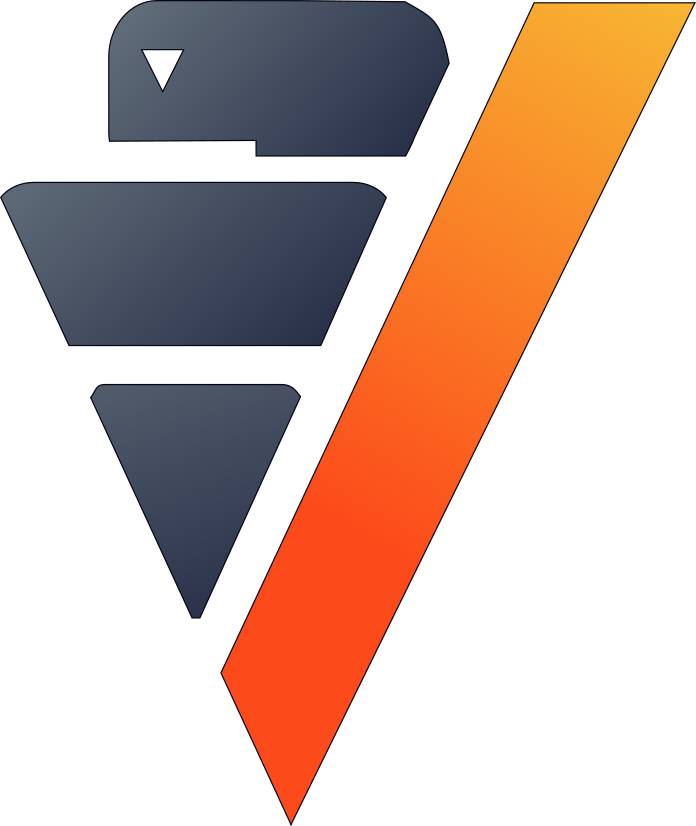

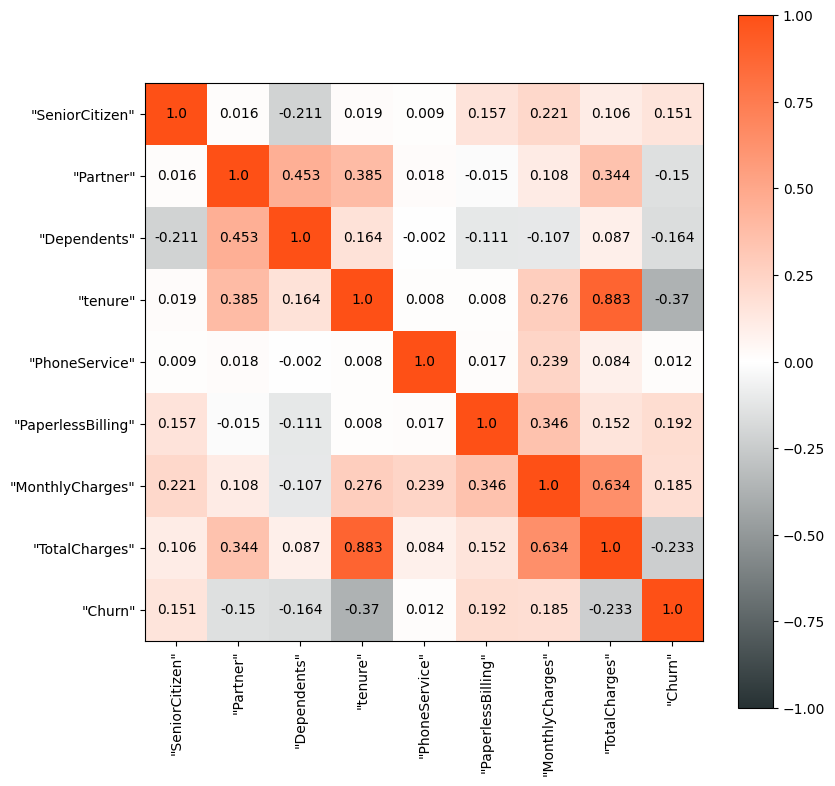

In [11]:
# Compute correlation
churn_data.corr(columns=num_cols,
                method='spearman')

  0%|          | 0/17 [00:00<?, ?it/s]

,"""customerID""","""gender""","""SeniorCitizen""","""Partner""","""Dependents""","""PhoneService""","""MultipleLines""","""InternetService""","""OnlineSecurity""","""OnlineBackup""","""DeviceProtection""","""TechSupport""","""StreamingTV""","""StreamingMovies""","""Contract""","""PaperlessBilling""","""PaymentMethod""","""Churn"""
"""customerID""",1,0.7071387759872941,0.8533988239339025,0.7075137962272524,0.7617937674788702,0.9083424868747245,0.8423185423961393,0.8241182589052664,0.8293968523170167,0.824052991235141,0.8241100151107151,0.8289549641545605,0.822756376161546,0.8227324857138872,0.8379652208984673,0.7190332195604549,0.8679291439283205,0.7810906445878953
"""gender""",0.7071387759872941,1,0.001873711638260736,0.001808079661789021,0.010516611922734077,0.006487672136208199,0.009451666570452976,0.011319816023820888,0.0170248673996952,0.013798357377745577,0.0060292442384310314,0.009722241217455355,0.008844328042668036,0.010640764864840464,0.008152557349604891,0.011753691221222193,0.01864584107758851,0.008612095078997812
"""SeniorCitizen""",0.8533988239339025,0.001873711638260736,1,0.016478657597413914,0.21118508849395765,0.008576401079279436,0.1466428981547604,0.26532401247490706,0.21107026551439387,0.18277371600205183,0.18307117871498424,0.22405049807030314,0.18558579209841322,0.18896193131088726,0.1438683664984389,0.15652955931117277,0.19598451589487909,0.1508893281764731
"""Partner""",0.7075137962272524,0.001808079661789021,0.016478657597413914,1,0.4526762829294638,0.017705663223972032,0.14389768511332032,0.0009073521208289714,0.1520098144303294,0.15333685221744686,0.16656826190673807,0.12764156082912625,0.13734265561456047,0.1295738983957767,0.29603947593743685,0.01487662228789104,0.16276227893705197,0.15044754495917656
"""Dependents""",0.7617937674788702,0.010516611922734077,0.21118508849395765,0.4526762829294638,1,0.0017616785446837105,0.025094016713979587,0.1802672478825538,0.19457924376849997,0.1627601413923546,0.15757010710298983,0.1823774404156106,0.14708243957321443,0.1413353739608838,0.24421223608441336,0.11137722919364426,0.15074411049283012,0.16422140157972528
"""PhoneService""",0.9083424868747245,0.006487672136208199,0.008576401079279436,0.017705663223972032,0.0017616785446837105,1,0.9083424868747245,0.3756877098193481,0.1004543340659466,0.09426132351692645,0.0933403708615453,0.10168502026979014,0.1075905732294665,0.10262843139014985,0.003976117347714681,0.01650480573256966,0.010297221766590077,0.01194198002900308
"""MultipleLines""",0.8423185423961393,0.009451666570452976,0.1466428981547604,0.14389768511332032,0.025094016713979587,0.9083424868747245,1,0.35442564054609377,0.20549824502887423,0.22274250160703957,0.22404038042422336,0.20611678556080693,0.24092390664877442,0.24153764189544388,0.08040766226914967,0.16634063233977742,0.1669298080382473,0.04010925283378872
"""InternetService""",0.8241182589052664,0.011319816023820888,0.26532401247490706,0.0009073521208289714,0.1802672478825538,0.3756877098193481,0.35442564054609377,1,0.5959261119397458,0.5747918951855748,0.5746979259753913,0.5940263647919771,0.5869475572452835,0.5856137246362116,0.20692091402897067,0.3784273654205174,0.3131230023778106,0.32245455521230887
"""OnlineSecurity""",0.8293968523170167,0.0170248673996952,0.21107026551439387,0.1520098144303294,0.19457924376849997,0.1004543340659466,0.20549824502887423,0.5959261119397458,1,0.5885783134226351,0.587182704257195,0.6063578188342443,0.575535268964284,0.5760517524952443,0.30134873250567035,0.34179975542511276,0.30495874601380435,0.3474004326740551
"""OnlineBackup""",0.824052991235141,0.013798357377745577,0.18277371600205183,0.15333685221744686,0.1627601413923546,0.09426132351692645,0.22274250160703957,0.5747918951855748,0.5885783134226351,1,0.5894213880027672,0.5902863075237831,0.5840131835568888,0.5827676397944742,0.2585717875284732,0.3210458207980537,0.282516640706162,0.2923155121954445

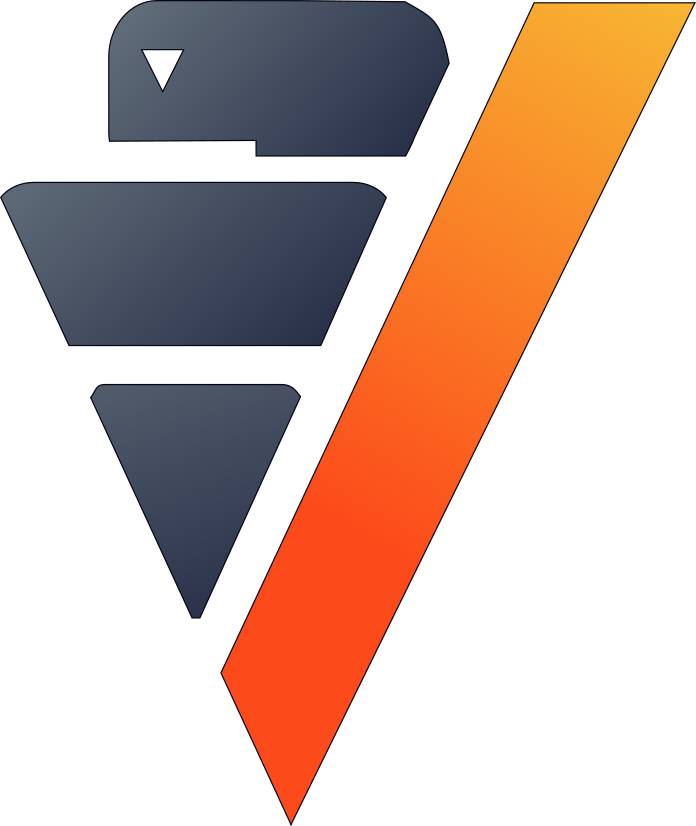

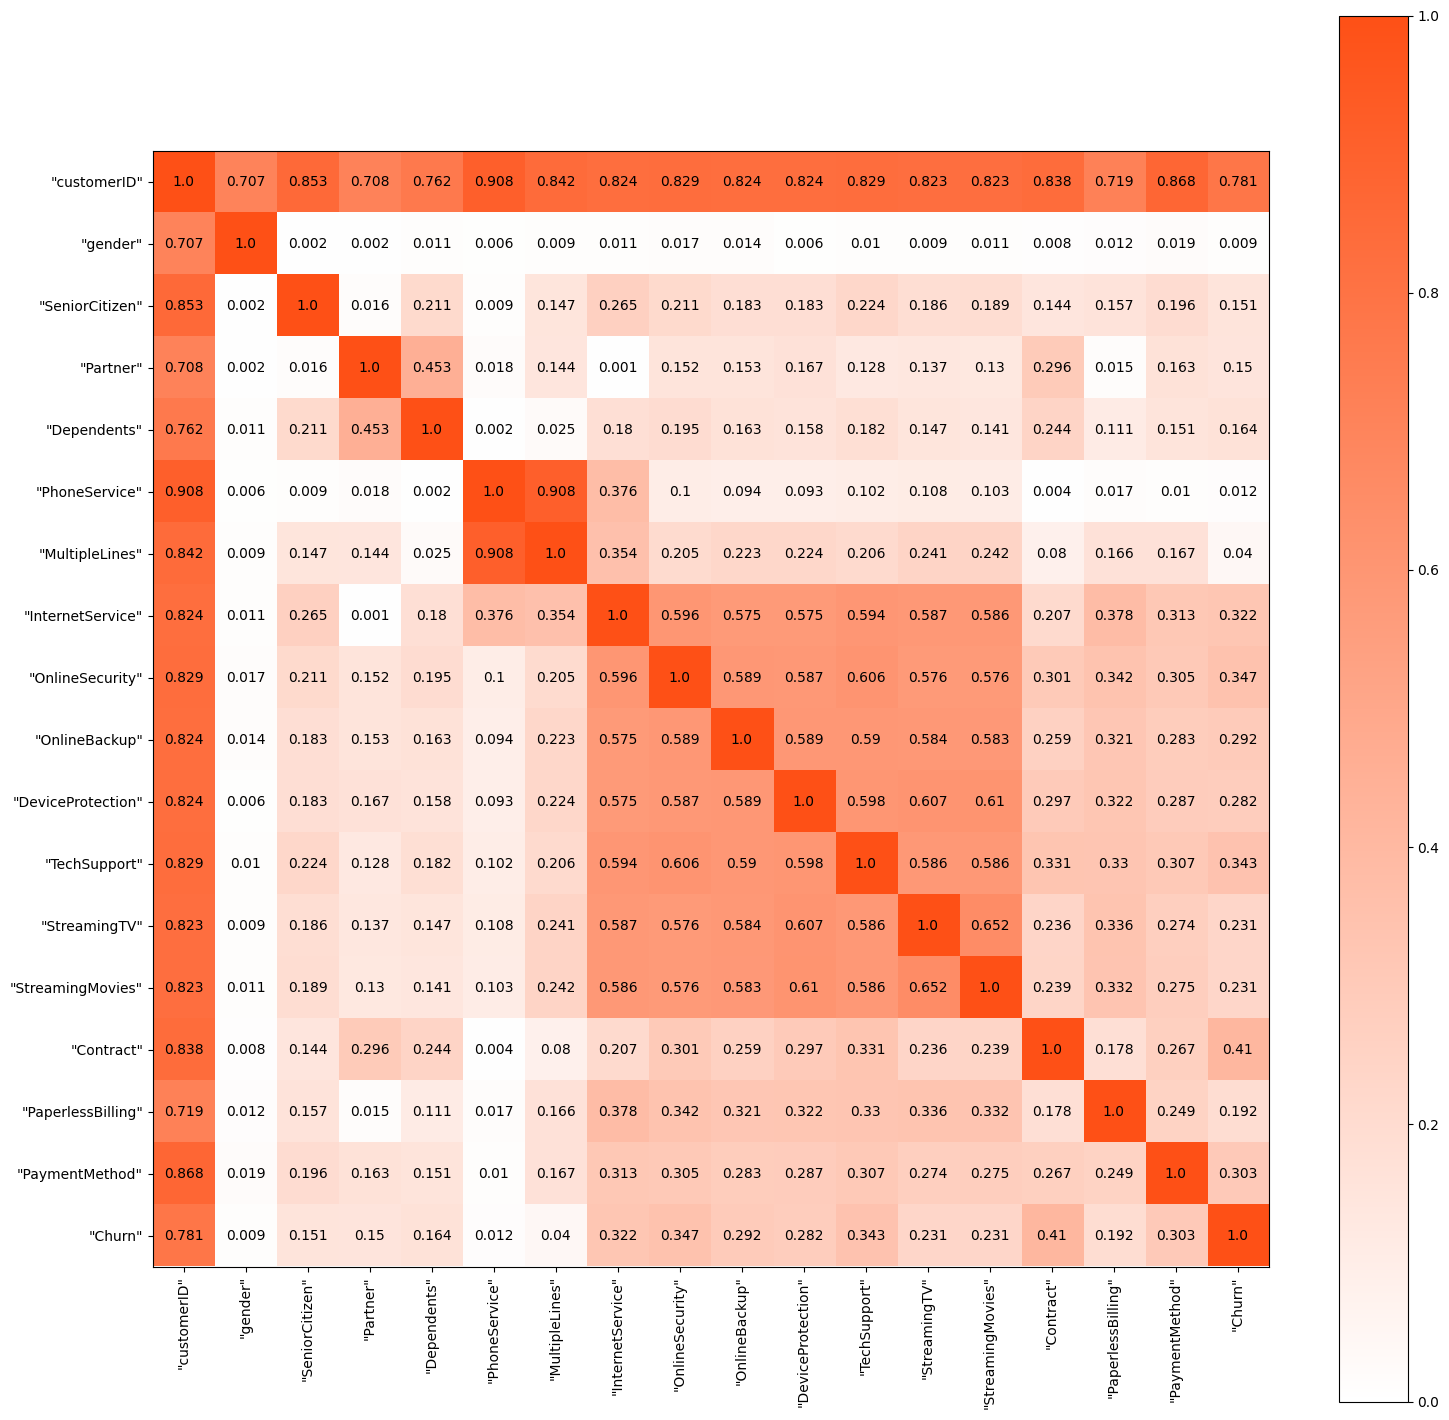

In [12]:
# correlation using cramer
churn_data.corr(columns=cat_clos,
                method='cramer')

You can also use the function to focus the correlation into one target

,"""Churn"""
"""Churn""",1
"""customerID""",0.7810906445878953
"""Contract""",0.4101156965761409
"""OnlineSecurity""",0.3474004326740551
"""TechSupport""",0.3429161982469257
"""InternetService""",0.32245455521230887
"""PaymentMethod""",0.3033586255540706
"""OnlineBackup""",0.2923155121954445
"""DeviceProtection""",0.281579732968073
"""StreamingMovies""",0.230950809069268

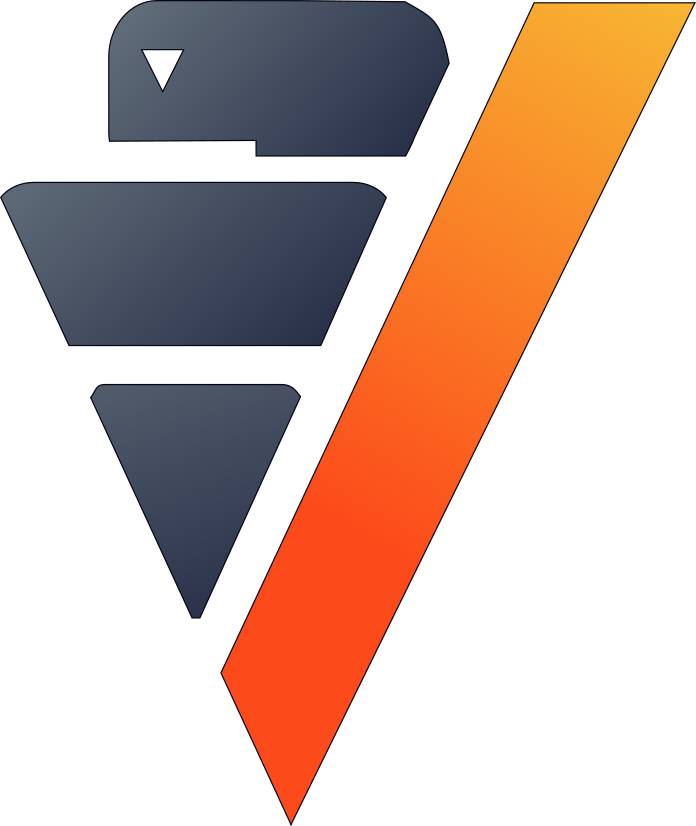

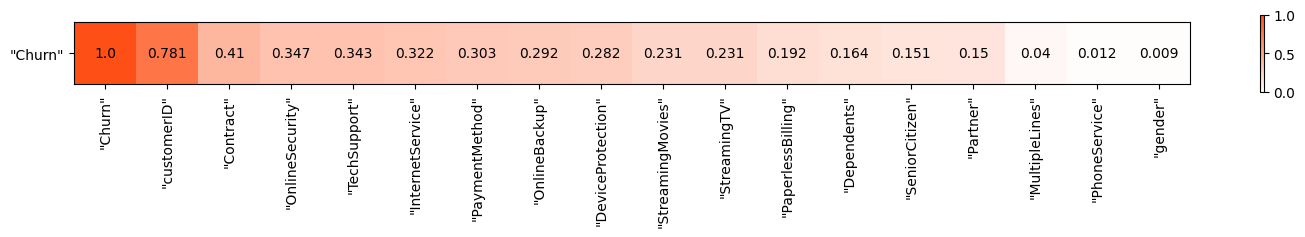

In [13]:
# Compute correlation between the target and the variables
churn_data.corr(method="cramer", focus="Churn")

### Data Visualization
One of the main tools for data exploration is charts. Using visualization will allow you to draw better conclusions and understanding of your data.

VerticaPy has integration with `matplotlib`  and `hightchart` libraries (in this section we will use only static charts) so you can have more flexibility using `matplotlib` parameters for better display.


For more details please check the [documentation](https://www.vertica.com/python/workshop/data_exploration/charts/index.php)

In [14]:
STYLE = 'ggplot'
COLOR = '#66b3ff'
# you can chooss the style
plt.style.use(STYLE)

<AxesSubplot:xlabel='"TotalCharges"', ylabel='Density'>

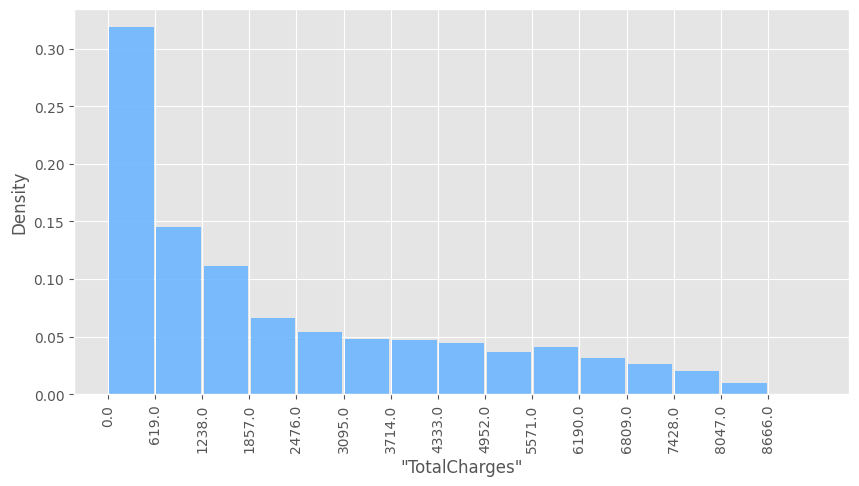

In [15]:
# customize the size of the plot
fig, ax = plt.subplots(figsize=(10, 5))
# Histogram
churn_data['TotalCharges'].hist(method='density',
                                color=COLOR,
                                ax=ax)

You can also use the aggregation for preticular column.

<AxesSubplot:xlabel='"Contract"', ylabel='avg("TotalCharges")'>

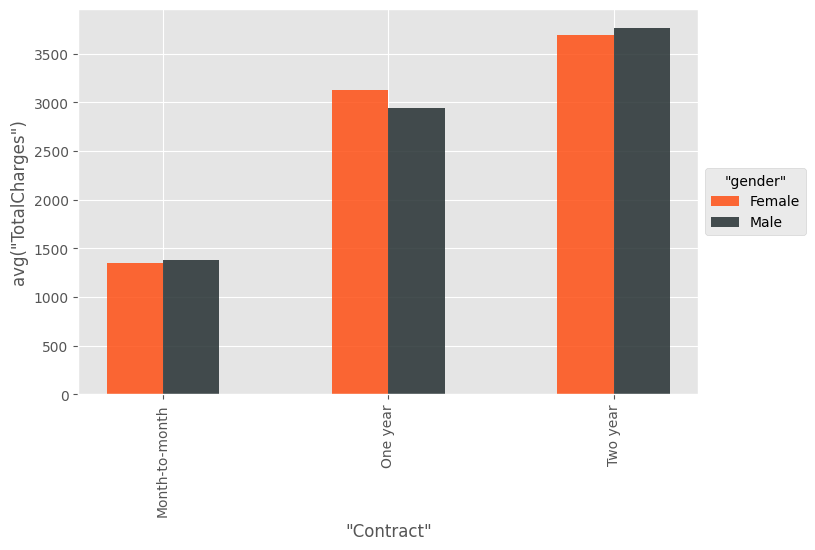

In [16]:
# customize the size of the plot
fig, ax = plt.subplots(figsize=(10, 5))

churn_data.hist(['contract', 'gender'],
                of='TotalCharges',
                method='avg',
                ax=ax
                )

In [17]:
# Additional parameters for pie charts
pie_kwds = {
    "colors": ['#ff9999', '#66b3ff'],
    "pctdistance": 0.2,
    "autopct": '%1.1f%%',
    "labeldistance": 0.6,
    "startangle": 45,
    "radius": 1.3,
}

<AxesSubplot:>

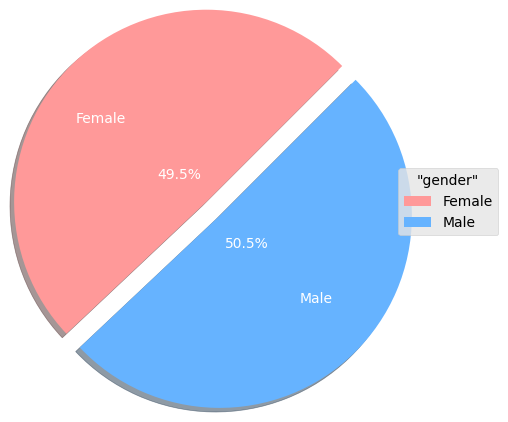

In [18]:
# Plot pie chart for gender
churn_data['gender'].pie(
    method="count",
    max_cardinality=10,
    pie_type="auto",  # auto,donut, rose
    **pie_kwds)

Scatter plot

<AxesSubplot:xlabel='"MonthlyCharges"', ylabel='"TotalCharges"'>

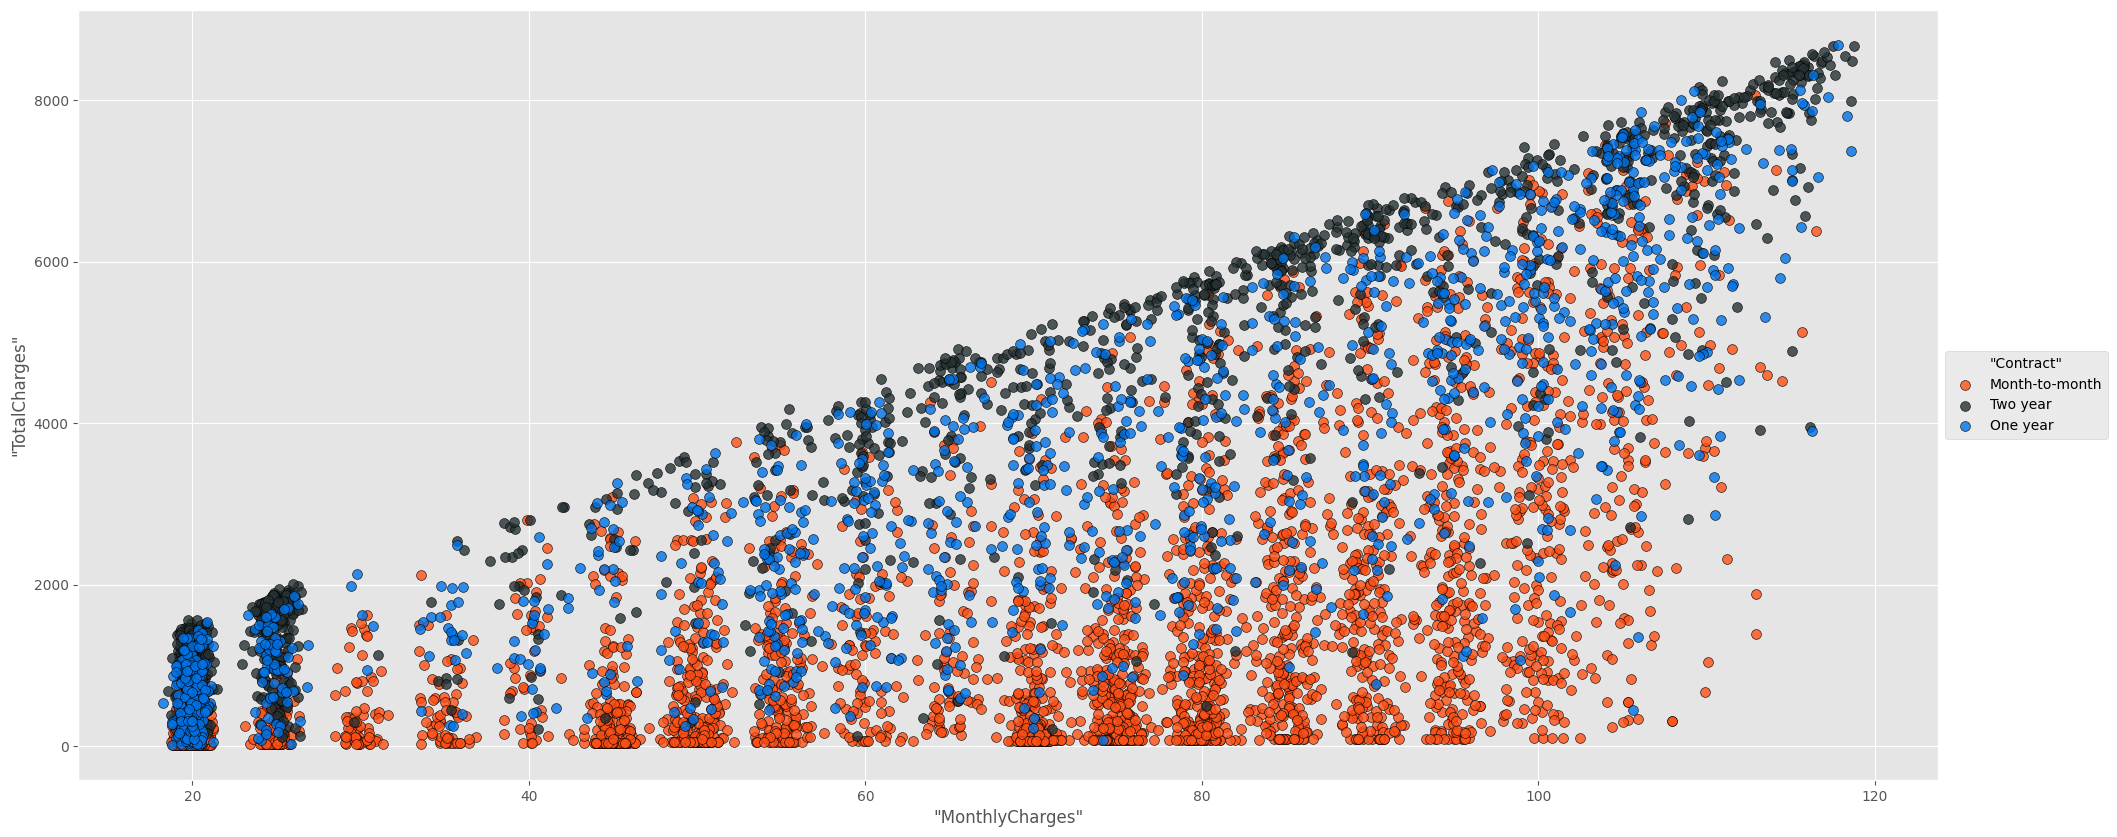

In [19]:
# set the axis
fig, ax = plt.subplots(figsize=(30, 10))
# Scatter plot
churn_data.scatter(['MonthlyCharges', 'TotalCharges'],
                   catcol="Contract",
                   max_cardinality=10,
                   cat_priority=[],
                   # True: aggregate the small representavive set, False will not aggregate them and not plot them
                   with_others=False,
                   dimensions=None,
                   ax=ax,)

Boxplot

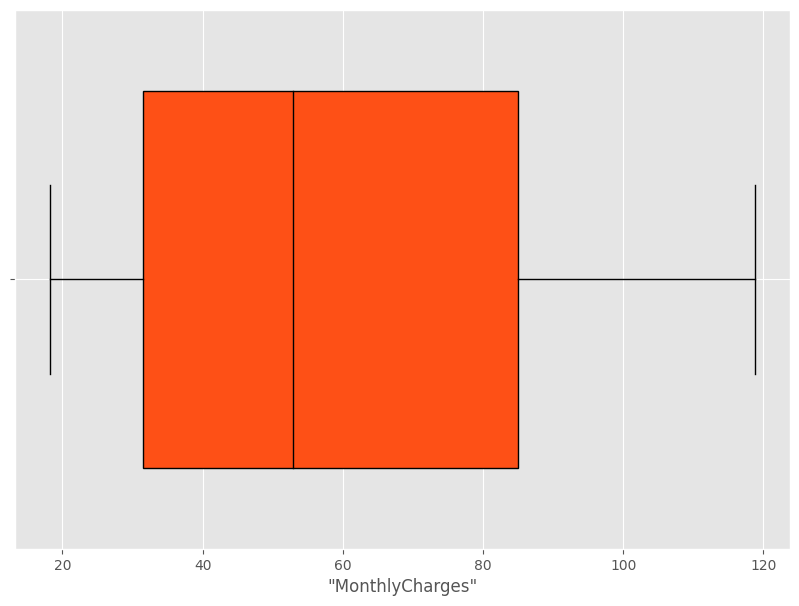

In [20]:
# set the axis
fig, ax = plt.subplots(figsize=(10, 7))
# boxplot
churn_data.boxplot(columns=['MonthlyCharges'],
                   ax=ax,
                   )

### Time Series: Correlation and Seasonality  

Investigating seasonality of the time series is very important because some models makes assumption about the stationarity of the data.

,📅dateDate,123GoldFloat,123OilFloat,123SpreadFloat,123VixFloat,123Dol_EurFloat,123SP500Float
1,1986-01-01,345.561363636364,22.9254545454545,1.05142857142857,18.1213636363636,1.12159999999858,211.779999
2,1986-02-01,339.0525,15.4547368421053,0.736842105263158,20.6242105263158,1.07880000000296,226.919998
3,1986-03-01,346.094736842105,12.6125,0.564,23.564,1.04850000000442,238.899994
4,1986-04-01,340.715909090909,12.8436363636364,0.604090909090909,23.0154545454545,1.05259999999544,235.520004
5,1986-05-01,342.325,15.377619047619,0.642380952380952,18.8875,1.03720000000612,247.350006
6,1986-06-01,342.797619047619,13.4257142857143,0.614761904761905,18.5980952380952,1.0399999999936,250.839996
7,1986-07-01,348.554347826087,11.5845454545455,0.636818181818182,19.6390909090909,1.01029999999446,236.119995
8,1986-08-01,376.29,15.0966666666667,0.83952380952381,18.6380952380952,0.979300000000876,252.929993
9,1986-09-01,418.152272727273,14.8666666666667,1.10142857142857,22.7052380952381,0.973200000000361,231.320007
10,1986-10-01,423.863043478261,14.8968181818182,1.14727272727273,22.5239130434783,0.961600000000544,243.979996

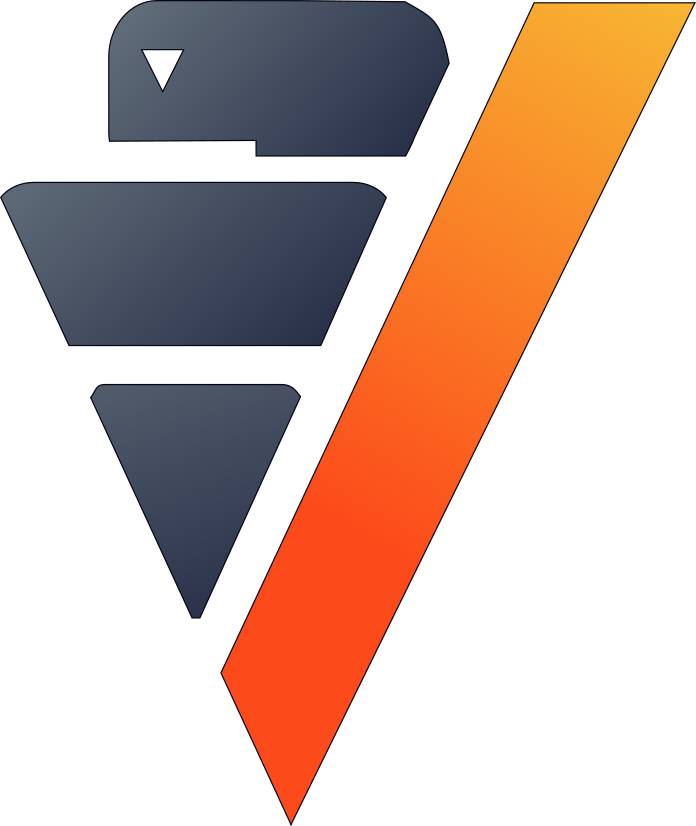

In [21]:
from verticapy.datasets import load_commodities
commodities = load_commodities()
display(commodities)

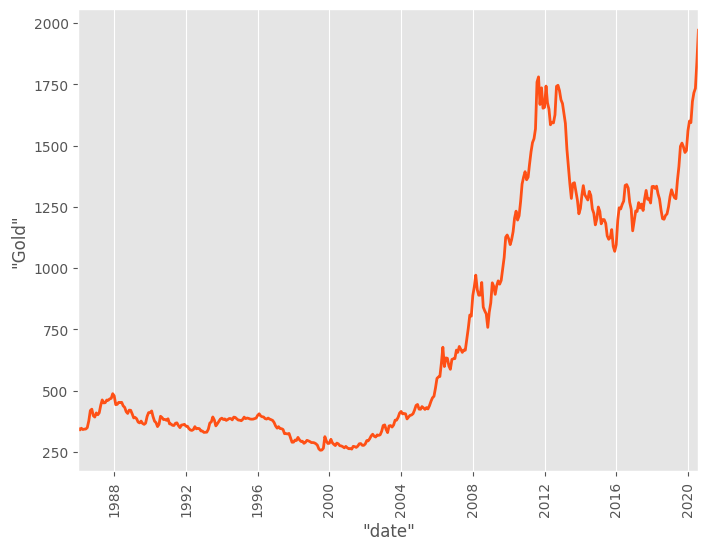

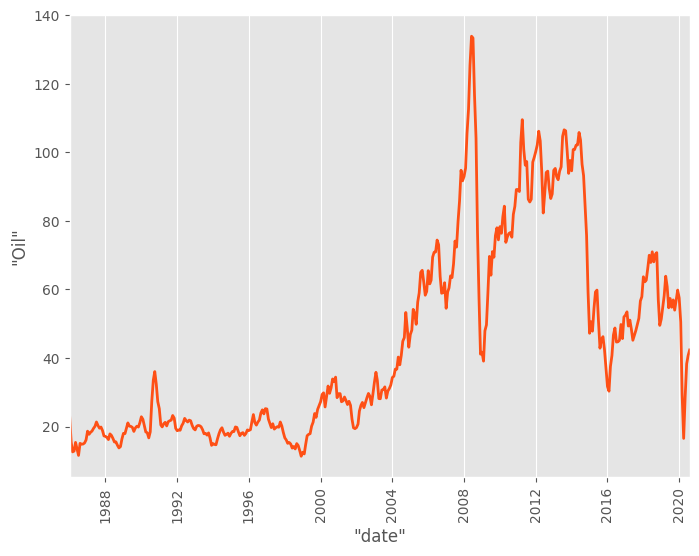

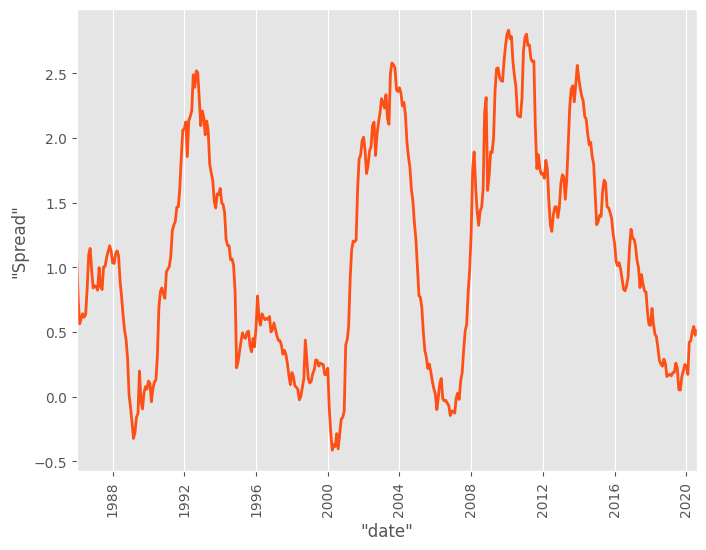

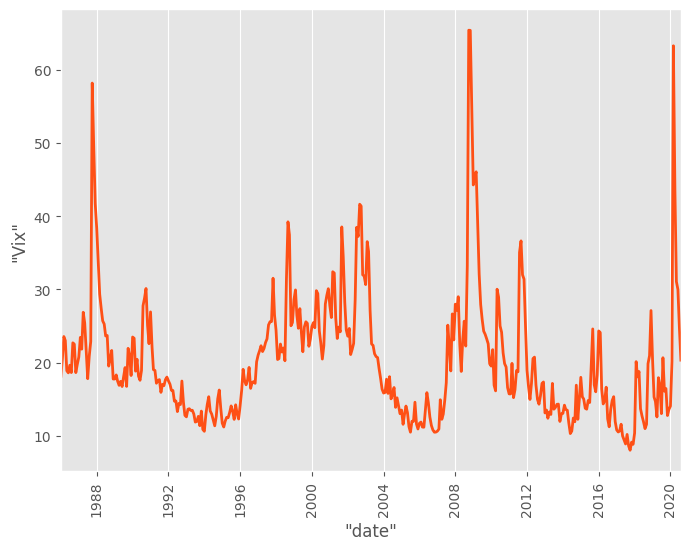

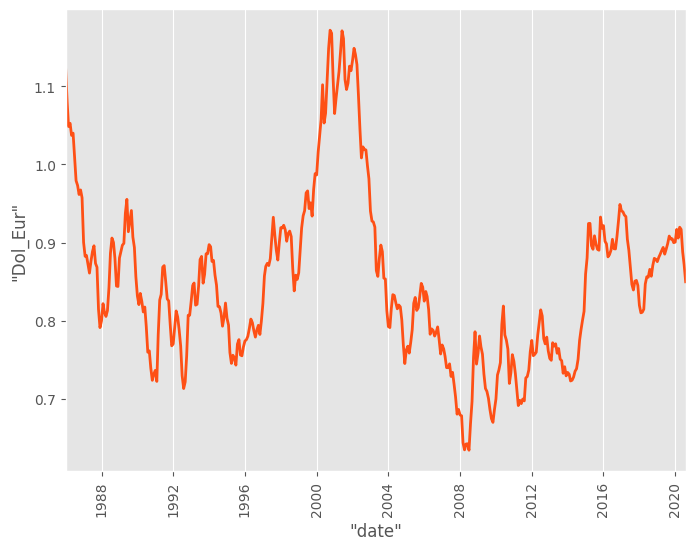

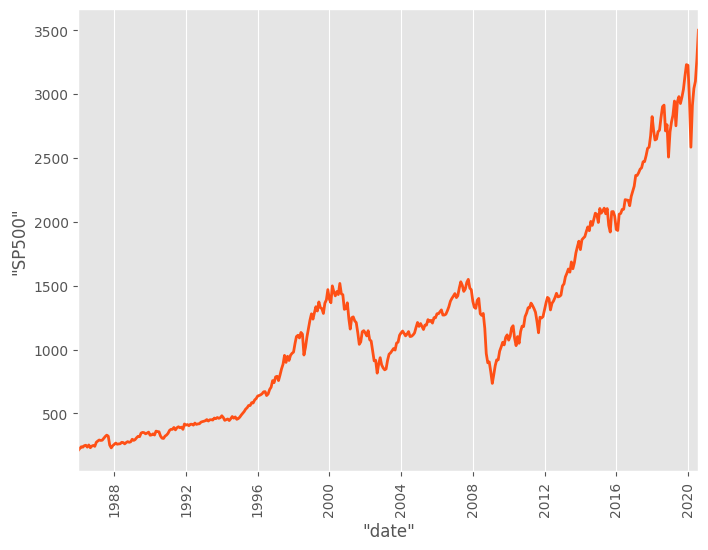

In [22]:
# plot Gold and Oil
for col in ['Gold', 'Oil', 'Spread', 'Vix', "Dol_Eur", 'SP500']:
    commodities.plot(ts='date', columns=col,)

For stationarity we can use Augmented [Dickey-Fuller](https://www.vertica.com/python/documentation-0.4.1/learn/tsa/adfuller/) test.

,value
ADF Test Statistic,0.8644171519061685
p_value,0.38787299226506
# Lags used,5
# Observations Used,416
Critical Value (1%),-3.44
Critical Value (2.5%),-3.13
Critical Value (5%),-2.87
Critical Value (10%),-2.57
Stationarity (alpha = 1%),❌

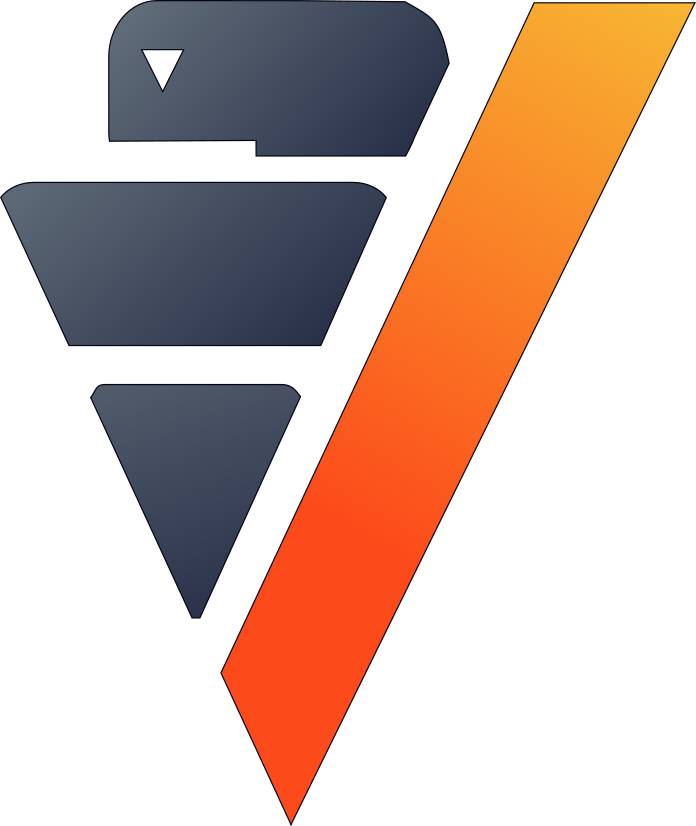

In [31]:
from verticapy.stats.tools import adfuller
adfuller(commodities,
         column = "Gold",
         ts = "date",
         p = 5)

The autocorrelation analysis helps in detecting hidden patterns and seasonality and in checking for randomness.

  0%|          | 0/41 [00:00<?, ?it/s]

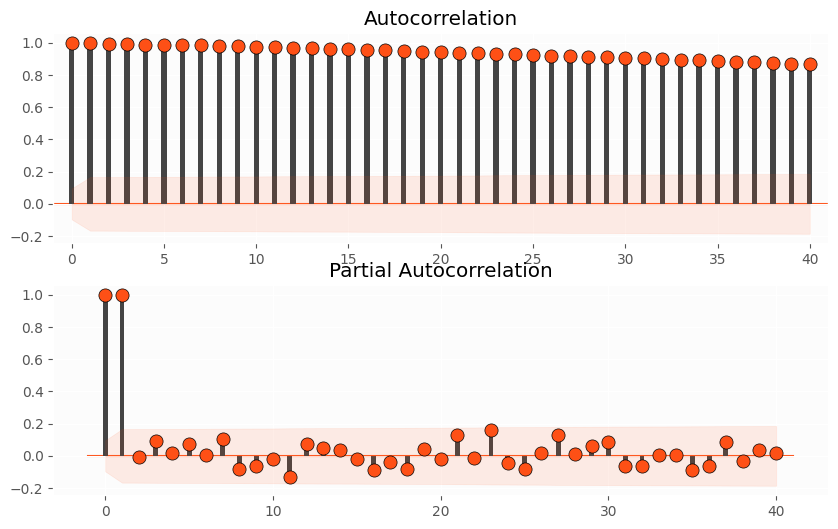

,acf,pacf,confidence
0,1.0,1.0,0.09609514041450774
1,0.997,0.996823952589872,0.1662894221070394
2,0.994,-0.00597481915081547,0.1664921231602554
3,0.991,0.093489978933617,0.16718055947060367
4,0.989,0.0180610163440547,0.1674014952283583
5,0.987,0.0723928922702552,0.16789702173983745
6,0.986,0.00497939254905395,0.1681030314550399
7,0.985,0.103304767278971,0.16890289669835765
8,0.982,-0.0805527682729035,0.16947064079989896
9,0.979,-0.0609275884224793,0.16988507407613215

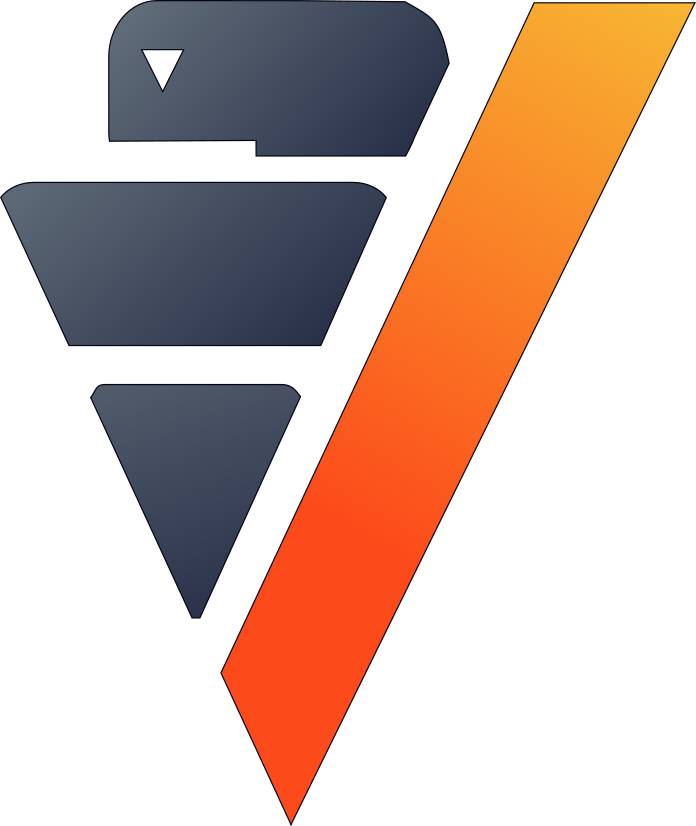

In [23]:
from verticapy.learn.model_selection import plot_acf_pacf
plot_acf_pacf(commodities,
              column="SP500",
              ts="date",
              p=40)